In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    recall_score, precision_score, f1_score, roc_curve, auc
)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization, Embedding, Flatten, Input, Concatenate
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [3]:
# data sets
test_df = pd.read_csv('test (1).csv', sep=';')
train_df = pd.read_csv('train (2).csv', sep=';')

# processing data
target_column = train_df.columns[-1]  #target column
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

# use same LabelEncoder for testing and training data
encoder = LabelEncoder()

# learning encoder on y_train
encoder.fit(y_train)

# transform both data sets
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)  # same encoder fo no errors

# transfer to  one-hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# processing text columns
text_columns = X_train.select_dtypes(include=['object']).columns
for col in text_columns:
    le = LabelEncoder()
    # Fit the LabelEncoder on the combined unique values from both train and test
    all_values = pd.concat([X_train[col], X_test[col]]).unique()
    le.fit(all_values)
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# normalize numbers columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# neural network creation
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer"
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(32, activation='relu'),  # Hidden layer
    Dense(y_train.shape[1], activation='softmax')  # Output layer (softmax for multiple classes)
])

# Model compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# training model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# model evaluation
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  #converting probabilities to classes
y_test_classes = np.argmax(y_test, axis=1)

# displaying the classification report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# displaying the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

d:\DataScience2024\Projekty\Final_project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7171 - loss: 0.5616 - val_accuracy: 0.7534 - val_loss: 0.4874
Epoch 2/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7579 - loss: 0.4946 - val_accuracy: 0.7526 - val_loss: 0.4732
Epoch 3/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7636 - loss: 0.4822 - val_accuracy: 0.7685 - val_loss: 0.4554
Epoch 4/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7666 - loss: 0.4675 - val_accuracy: 0.7591 - val_loss: 0.4555
Epoch 5/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7670 - loss: 0.4665 - val_accuracy: 0.7665 - val_loss: 0.4448
Epoch 6/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7763 - loss: 0.4437 - val_accuracy: 0.7818 - val_loss: 0.4126
Epoch 7/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7784 - loss: 0.4306 - val_accuracy: 0.7956 - val_loss: 0.3937
Epoch 8/50
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7917 - loss: 0.4079 - val_accuracy: 0

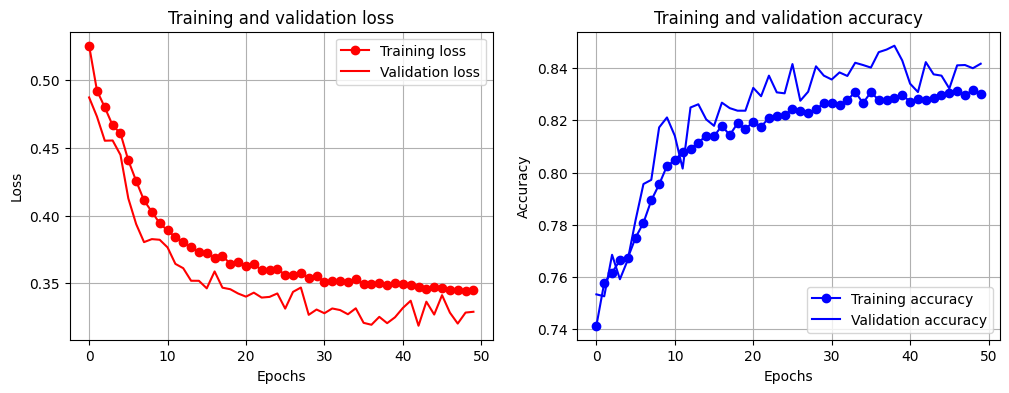

d:\DataScience2024\Projekty\Final_project\.venv\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 3))', 'Tensor(shape=(32, 3))')
  warnings.warn(msg)


254/254 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step


d:\DataScience2024\Projekty\Final_project\.venv\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, 3))', 'Tensor(shape=(None, 3))')
  warnings.warn(msg)



Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      3753
           1       0.82      0.90      0.86      4364

    accuracy                           0.84      8117
   macro avg       0.85      0.84      0.84      8117
weighted avg       0.84      0.84      0.84      8117


Confusion Matrix:


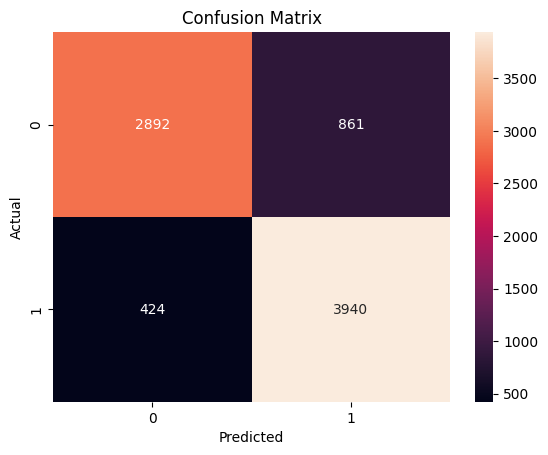

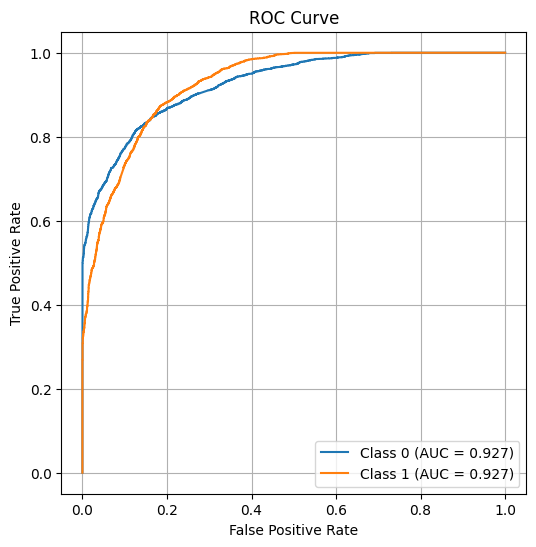

In [5]:
# Vizualizace průběhu trénování
plt.figure(figsize=(12, 4))

# Ztráta (loss) a přesnost (accuracy)
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], "ro-", label="Training loss")
plt.plot(history.history["val_loss"], "r-", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], "bo-", label="Training accuracy")
plt.plot(history.history["val_accuracy"], "b-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

plt.show()

# Predikce na testovacích datech
# Pokud model přijímá oba vstupy jako X_test_num a X_test_text
y_pred = model.predict([X_test, X_test])  # Předpokládám, že X_test obsahuje jak numerická, tak textová data

# Převod predikovaných pravděpodobností na třídy
y_pred_classes = np.argmax(y_pred, axis=1)

# Skutečné třídy
y_test_classes = np.argmax(y_test, axis=1)

# Klasifikační report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Matice záměn
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC křivka a AUC skóre
# Pro více tříd je třeba iterovat přes všechny třídy a vypočítat ROC křivky
plt.figure(figsize=(6, 6))
for i in range(y_test.shape[1]):  # iterace přes všechny třídy
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.3f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [7]:
# Predikce na testovacích datech
# Předpokládáme, že X_test obsahuje jak numerická, tak textová data
y_pred_probs = model.predict([X_test, X_test])  # Pravděpodobnosti tříd
y_pred = np.argmax(y_pred_probs, axis=1)  # Převod na nejpravděpodobnější třídu
y_true = np.argmax(y_test, axis=1)  # Skutečné hodnoty

# Výpočet metrik
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Výpis výsledků
print(f'🔹 Přesnost: {accuracy:.4f}')
print(f'🔹 Precision: {precision:.4f}')
print(f'🔹 Recall: {recall:.4f}')
print(f'🔹 F1-score: {f1:.4f}')



254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
🔹 Přesnost: 0.8417
🔹 Precision: 0.8445
🔹 Recall: 0.8417
🔹 F1-score: 0.8406
